In [1]:
# Installing Packages
suppressMessages(install.packages("RWeka"))
suppressMessages(install.packages("partykit"))
suppressMessages(install.packages("caTools"))

In [2]:
suppressMessages(library(RWeka))
suppressMessages(library(partykit))
suppressMessages(library(caTools))
suppressMessages(library(repr))
suppressMessages(library(foreign))

In [3]:
# Download messidor_features.arff file to /content

download.file('https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff','/content/messidor_features.arff')

In [4]:
# Load file into variable df
dataset = read.arff("./messidor_features.arff")
head(df)

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

---
#**J48 - Weka Classifier**
---

In [5]:
resultJ48 <- J48(Class~., data = dataset, control = Weka_control(C = .25))
resultJ48

J48 pruned tree
------------------

14 <= 0.02029
|   2 <= 55
|   |   1 <= 0
|   |   |   7 <= 1: 0 (4.0)
|   |   |   7 > 1
|   |   |   |   8 <= 101.64826
|   |   |   |   |   14 <= 0.001954
|   |   |   |   |   |   8 <= 61.995063
|   |   |   |   |   |   |   11 <= 0.186842
|   |   |   |   |   |   |   |   11 <= 0.095217
|   |   |   |   |   |   |   |   |   18 <= 0
|   |   |   |   |   |   |   |   |   |   3 <= 29: 1 (10.0/1.0)
|   |   |   |   |   |   |   |   |   |   3 > 29
|   |   |   |   |   |   |   |   |   |   |   2 <= 41: 0 (4.0)
|   |   |   |   |   |   |   |   |   |   |   2 > 41: 1 (4.0/1.0)
|   |   |   |   |   |   |   |   |   18 > 0
|   |   |   |   |   |   |   |   |   |   8 <= 8.030835: 0 (2.0)
|   |   |   |   |   |   |   |   |   |   8 > 8.030835: 1 (2.0)
|   |   |   |   |   |   |   |   11 > 0.095217: 0 (6.0/1.0)
|   |   |   |   |   |   |   11 > 0.186842: 1 (14.0)
|   |   |   |   |   |   8 > 61.995063: 0 (8.0/1.0)
|   |   |   |   |   14 > 0.001954: 0 (3.0)
|   |   |   |   8 > 101.64826: 

In [6]:
evalJ48 <- evaluate_Weka_classifier(resultJ48,numFolds = 10)
evalJ48

=== 10 Fold Cross Validation ===

=== Summary ===

Correctly Classified Instances         744               64.6394 %
Incorrectly Classified Instances       407               35.3606 %
Kappa statistic                          0.2946
Mean absolute error                      0.3872
Root mean squared error                  0.5161
Relative absolute error                 77.7351 %
Root relative squared error            103.4081 %
Total Number of Instances             1151     

=== Confusion Matrix ===

   a   b   <-- classified as
 366 174 |   a = 0
 233 378 |   b = 1

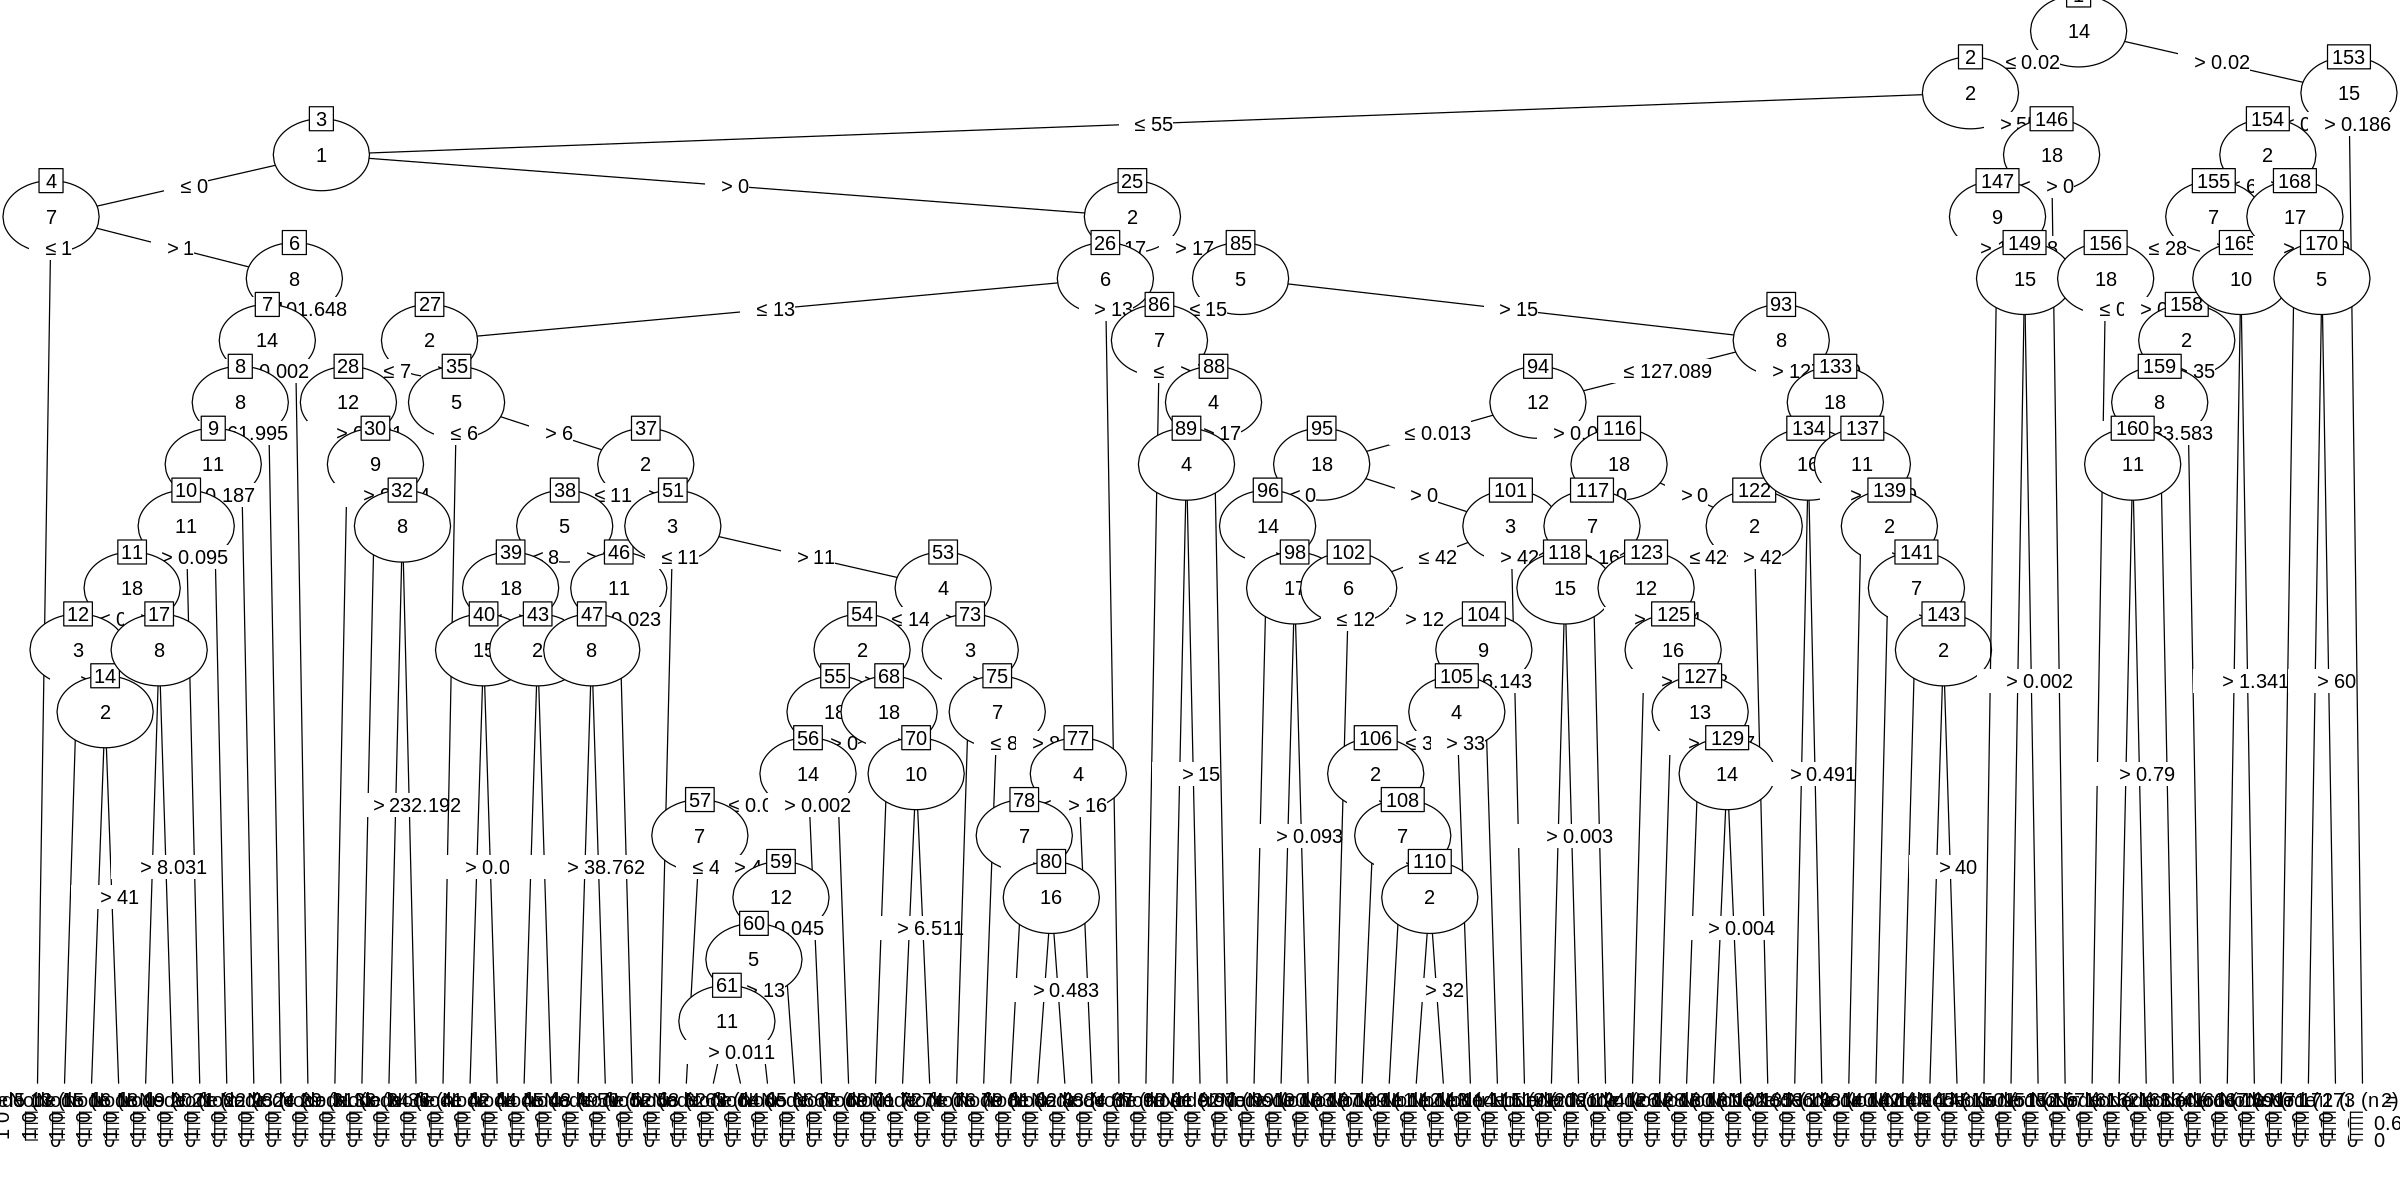

In [7]:
options(repr.plot.width=20, repr.plot.height=10)
plot(resultJ48)

---
#**J48 - Weka Split**
---

In [8]:
spl = sample.split(df$Class, SplitRatio = 0.7)

dataTrain = subset(df, spl==TRUE)
dataTest = subset(df, spl==FALSE)

resultJ48 <- J48(Class~., dataTrain) 
dataTest.pred <- predict(resultJ48, newdata = dataTest)
table(dataTest$Class, dataTest.pred)

ERROR: ignored

In [ ]:
resultJ48

In [ ]:
summary(resultJ48)